In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#pretty plot stuff
#I use this to make changes to my plot
plt.rcParams['figure.figsize'] = (8,6.5)           # changes my figure size with length 8 and width 6.5
plt.rcParams['legend.frameon'] = True              # if True, legend will have a border
plt.rcParams['legend.fontsize'] = 12               # legend fontsize is 12
plt.rcParams['legend.borderpad'] = 0.5             # width of the border of the legend
plt.rcParams["legend.framealpha"] = 0.8            # changes how transparant the legend is.
plt.rcParams['font.family'] = 'STIXGeneral'        # sets font
plt.rcParams['font.size'] = 20                     #sets general font size

# Bisection Search
This notebook will numerically find the roots using the bisection search method.

In [173]:
#define function we want to find the roots of
def function_for_roots(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c

In [174]:
#function to check if initial values are valid
def check_initial_values(f, x_min, x_max, tol):
    #check initial guesses
    y_min = f(x_min)
    y_max = f(x_max)
    
    #check if x_min and x_max contain a zero crossing
    if(y_min*y_max >= 0.0):
        print("No zero crossing found in range = ", x_min, x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min, y_min, x_max, y_max)
        print(s)
        return 0
    
    #if x_min is a root, then return flag == 1
    if(np.fabs(y_min) < tol):
        return 1
    
    #if x_max is a root, then return flag ==2
    if(np.fabs(y_max) < tol):
        return 2
    
    #if we reach this point, the bracket is valid and we will return 3
    return 3

In [175]:
#define main work function that actually goes through the search, BISECTION SEARCH
def bisection_root_finding(f, x_min_start, x_max_start, tol):
    
    x_min = x_min_start         #minimum x in bracket
    x_max = x_max_start         #maximum x in bracket
    x_mid = 0.0                 #midpoint
    
    y_min = f(x_min)            #function value at x_min
    y_max = f(x_max)            #function value at x_max
    y_mid = 0.0                 #midpoint
    
    imax = 1000                 #sets a max number of iterations
    i = 0                       #iteration number
    
    #check initial values
    flag = check_initial_values(f, x_min, x_max, tol)
    if(flag == 0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid', x_min, x_max)
    elif(flag == 1):
        return x_min            #lucky guess
    elif(flag == 2):
        return x_max            #lucky guess
    
    #Now conduct the search if this point is reached
    flag = 1                    #sets flag
    
    #enter a while loop
    while(flag):
        x_mid = 0.5 * (x_min + x_max)   #midpoint
        y_mid = f(x_mid)
        
        #check if x_mid is root
        if(np.fabs(y_mid) < tol):
            flag = 0
        else:
            #x_mid is not a root
            #replace end point of bracket if poduct of function of end point if greater than 0
            if(f(x_min) * f(x_mid) > 0):
                x_min = x_mid      #replaced x_min with x_mid
            else:
                x_max = x_mid      #replaced x_max with x_mid
                
        print(x_min, f(x_min), x_max, f(x_max)) #prints limits of this iteration
        
        i += 1       #count the iteration, makes the for loop keep going
        
        #if max number of iterations is exceeded, quit
        if(i >= imax):
            print("Exceeded max number of iterations = ", i)
            s = "Min bracket f($f) = %f" % (x_min, f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max, f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (x_mid, f(x_mid))
            raise StopIteration('Stopping iterations after', i)
            
        #print("Iteration: %f" %(i))
    
    #DONE!
    iteration = np.round(i, 2)            #gets the number of the iteration
    print("Iterations: " + str(i))        #prints out the total number of iterations
    return x_mid

The following cell will find both roots. The first part will find root 1 and the second part will find root 2. It will also print out the total number of iterations it took to converge to each root.

In [182]:
#SEARCH TIME for Root 1
x_min1 = 0.9
x_max1 = 1.2
tolerance = 1.0e-6

y_min1 = 1.01*x_min1**2 - 3.04*x_min1 + 2.07 
y_max1 = 1.01*x_max1**2 - 3.04*x_max1 + 2.07

#print the initial guesses
print(x_min1, function_for_roots(x_min1))
print(x_max1, function_for_roots(x_max1))

x_root1 = bisection_root_finding(function_for_roots, x_min1, x_max1, tolerance)
y_root1 = function_for_roots(x_root1)

s = "Root 1 found with y(%f) = %f" % (x_root1, y_root1)
print(s)

#SEARCH TIME for Root 2
x_min2 = 1.8
x_max2 = 2.1

y_min2 = 1.01*x_min2**2 - 3.04*x_min2 + 2.07 
y_max2 = 1.01*x_max2**2 - 3.04*x_max2 + 2.07

#print the initial guesses
print(x_min2, function_for_roots(x_min2))
print(x_max2, function_for_roots(x_max2))

x_root2 = bisection_root_finding(function_for_roots, x_min2, x_max2, tolerance)
y_root2 = function_for_roots(x_root2)

s = "Root 2 found with y(%f) = %f" % (x_root2, y_root2)
print(s)

0.9 0.15209999999999968
1.2 -0.12360000000000015
0.9 0.15209999999999968 1.05 -0.008475000000000232
0.9750000000000001 0.06613124999999975 1.05 -0.008475000000000232
1.0125000000000002 0.027407812499999462 1.05 -0.008475000000000232
1.03125 0.009111328124999485 1.05 -0.008475000000000232
1.040625 0.00022939453124992681 1.05 -0.008475000000000232
1.040625 0.00022939453124992681 1.0453125 -0.004144995117188355
1.040625 0.00022939453124992681 1.04296875 -0.0019633483886720704
1.040625 0.00022939453124992681 1.041796875 -0.0008683639526370079
1.040625 0.00022939453124992681 1.0412109374999998 -0.00031983146667480256
1.040625 0.00022939453124992681 1.0409179687499999 -4.5305156707975414e-05
1.040771484375 9.202301502186927e-05 1.0409179687499999 -4.5305156707975414e-05
1.0408447265624998 2.335351109516992e-05 1.0409179687499999 -4.5305156707975414e-05
1.0408447265624998 2.335351109516992e-05 1.0408813476562497 -1.0977177321791487e-05
1.0408630371093748 6.1878282573424315e-06 1.0408813476562

Now we plot the function and the roots it found!

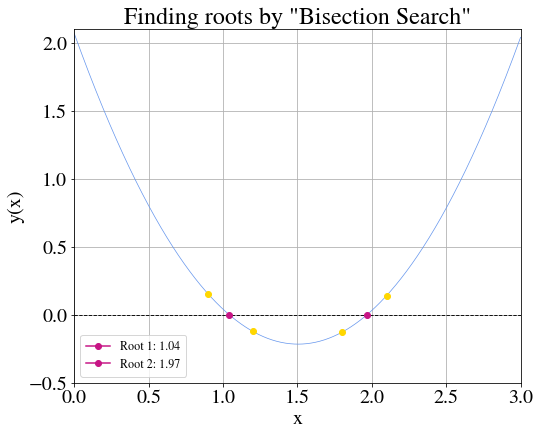

In [193]:
x = np.linspace(0, 3, 1000)

a = 1.01
b = -3.04
c = 2.07
plt.plot(x, a*x**2 + b*x + c, color = 'cornflowerblue', lw = 0.7)
plt.axhline(0, color = 'black', ls = '--', lw = 0.9)

xmin1 = np.round(x_min1, 2)
xmax1 = np.round(x_max1, 2)
xroot1 = np.round(x_root1, 2)
plt.plot(x_min1, y_min1, marker = 'o', color = "gold") #, label = "Minimum: " + str(xmin1))
plt.plot(x_max1, y_max1, marker = 'o', color = "gold") #, label = "Maximum: " + str(xmax1))
plt.plot(x_root1, y_root1, marker = 'o', color = 'mediumvioletred', label = "Root 1: " + str(xroot1))

xmin2 = np.round(x_min2, 2)
xmax2 = np.round(x_max2, 2)
xroot2 = np.round(x_root2, 2)
plt.plot(x_min2, y_min2, marker = 'o', color = "gold") #, label = "Minimum: " + str(xmin2))
plt.plot(x_max2, y_max2, marker = 'o', color = "gold") #, label = "Maximum: " + str(xmax2))
plt.plot(x_root2, y_root2, marker = 'o', color = 'mediumvioletred', label = "Root 2: " + str(xroot2))

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Finding roots by "Bisection Search"')
plt.legend(loc = 'best')
plt.xlim(0, 3)
plt.ylim(-0.5, 2.1)
plt.grid()